# Cone Search
### Ken Smith
Simple cone search.  Given RA, Dec, radius and type of parameter we want do a cone search.  Plot lightcurves of all the objects we get.

Demonstrates usage of:
* /cone/
* /objects/



### Python (3 only) requirements - pip install
lasair

In [4]:
!pip install lasair


DEPRECATION: Loading egg at /Users/roywilliams/Library/Python/3.11/lib/python/site-packages/pyglet-2.0.10-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


### Grab my Lasair API token
Get your Lasair token before you start. You can log into [Lasair](https://lasair.lsst.ac.uk) and click "My Profile"
at top right. Or use the command-line below.
```bash
curl --data "username=myusername&password=***********" https://lasair-ztf.lsst.ac.uk/api/auth-token/
```
Make a file called settings.py with a line like: `API_TOKEN = '0123456789abcdefxxxxxxxxxxxxxxxxxxxxxxxx'`

In [5]:
import settings
from astropy.time import Time
import matplotlib.pyplot as plt
from lasair import LasairError, lasair_client as lasair

### Do the cone search
Get all, nearest or just count. Note that objects are returned in ascending order of separation.

In [6]:
ra=132.209445
dec=29.870510

# Huge search radius of 16.66 arcmins - the maximum!
radius = 1000.0

L = lasair(settings.API_TOKEN)

try:
    result = L.cone(ra, dec, radius, requestType='count')
except LasairError as e:
    print("HELP")
    print(e)

print(result['count'])

try:
    result = L.cone(ra, dec, radius, requestType='nearest')
except LasairError as e:
    print(e)

print(result['object'], "%.2f" % result['separation'])
print()

requestType = 'all'

try:
    result = L.cone(ra, dec, radius, requestType='all')
except LasairError as e:
    print(e)

for obj in result:
    print(obj['object'], "%.2f" % obj['separation'])

radius = 3.0
# Get a bunch of < 100Mpc Supernovae (as defined by ATLAS)
coords = [
[203.591769,-23.730980],
[187.192529,46.520974],
[172.127842,58.563523],
[100.270337,40.064296],
[162.133712,35.077300],
[247.116923,41.219187],
[238.754663,39.670174],
[256.570000,38.392852],
[143.394821,51.615004],
[183.277423,79.029814],
[238.889725,6.801459],
[327.389254,-15.220055],
[255.022242,51.931962],
[311.440270,10.857499],
[5.174076,25.229498],
[238.578903,12.128718],
[257.445887,27.622998],
[344.619335,30.869878],
[247.905965,26.366215],
[244.377048,15.717950],
[216.481408,34.523060],
[262.221717,58.378195],
[258.002773,23.377053],
[186.441130,12.663494],
]

result = []
for coord in coords:
    try:
        r = L.cone(coord[0], coord[1], radius, requestType='all')
        if len(r) > 0:
            result += (r)
    except LasairError as e:
        print(e)

348
ZTF21aapyiku 0.04

ZTF21aapyiku 0.04
ZTF17aaaysrp 8.11
ZTF17aaaysrx 22.51
ZTF23abeoshg 59.37
ZTF22aaeiziq 78.91
ZTF17aaayssa 85.18
ZTF18aaaddss 140.76
ZTF18aaadcxy 148.11
ZTF19acyxnce 148.74
ZTF17aacvvqb 148.84
ZTF21aacrcxj 148.96
ZTF17aacmlgo 148.97
ZTF21aceiyzl 149.45
ZTF19aczjpso 149.75
ZTF18acexyml 150.46
ZTF23aaevsfj 157.90
ZTF18aaaddcd 164.55
ZTF20acpwyqm 170.88
ZTF18aaaddfo 173.39
ZTF23abpjlve 182.16
ZTF18aaaddbv 187.97
ZTF18aaaddcl 199.93
ZTF23aaauguy 223.82
ZTF18aaamnyh 224.48
ZTF18acsppdj 228.98
ZTF22acaerna 242.56
ZTF18acsoosc 244.35
ZTF21aafgnth 248.37
ZTF18aaadcyl 248.38
ZTF20aahyaze 248.62
ZTF22aahaysr 249.64
ZTF21aamsuub 253.30
ZTF21aagisel 254.42
ZTF18aaaddfh 254.78
ZTF20aamnugx 256.96
ZTF18aaamnxy 275.59
ZTF17aaaysru 281.54
ZTF18acicvba 295.05
ZTF19aaldydf 295.80
ZTF18acmrqfh 296.74
ZTF22abulmpw 300.26
ZTF22abpvnka 300.59
ZTF18aacyucs 302.63
ZTF18aabkltn 312.47
ZTF18aceyrfz 317.94
ZTF22abvgbog 321.92
ZTF18aaamnwu 322.02
ZTF20aakwowu 323.28
ZTF23aadmflu 325.03
ZTF22

### Grab the lightcurves using the objects API
(This is just optional!!)

/var/folders/v6/ls6g5mjn7rs6rhzk1hm4t_yw0000gn/T/ipykernel_29014/2895853311.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


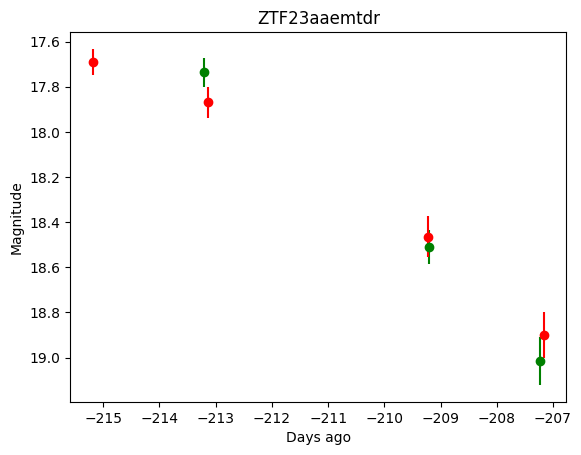

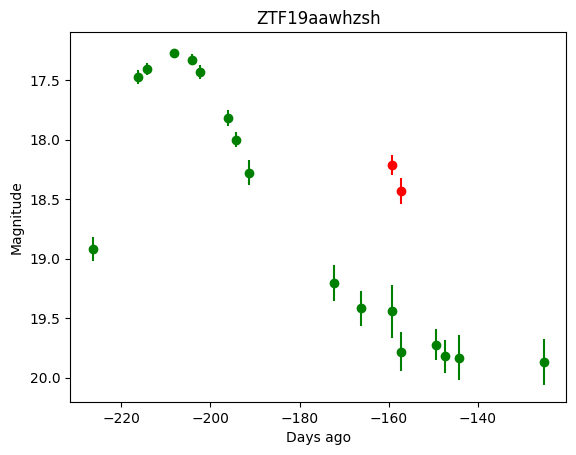

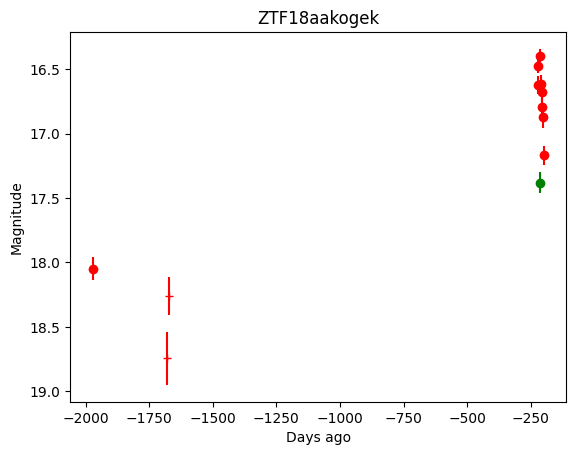

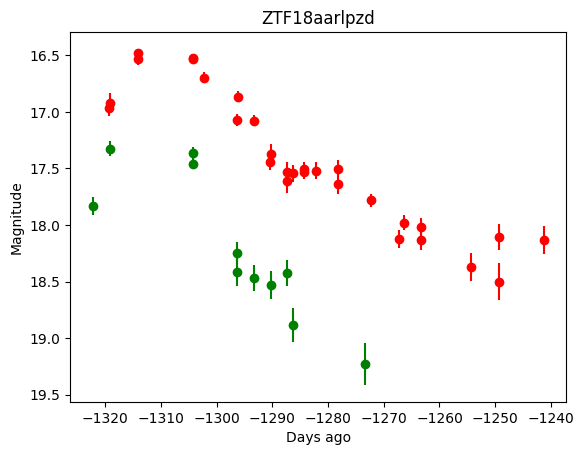

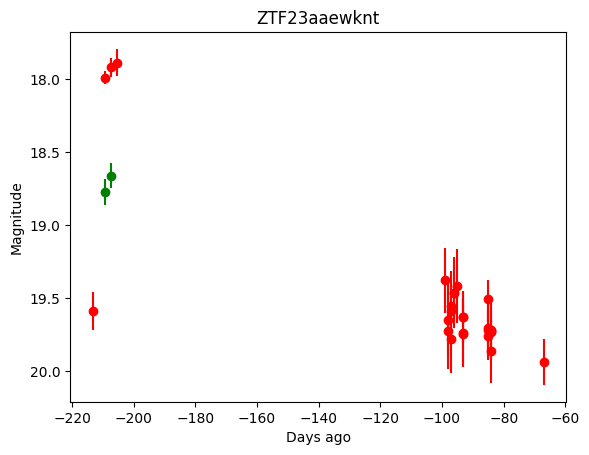

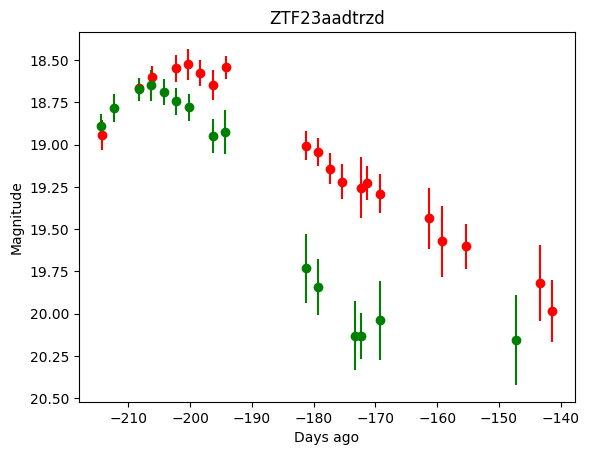

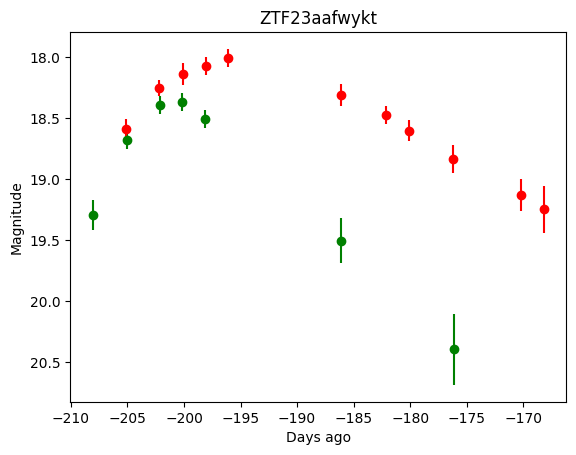

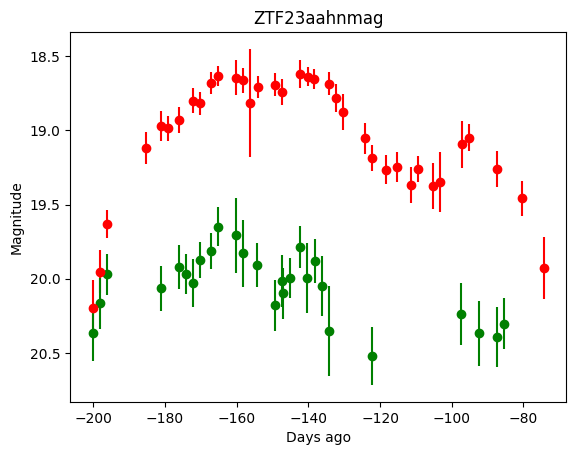

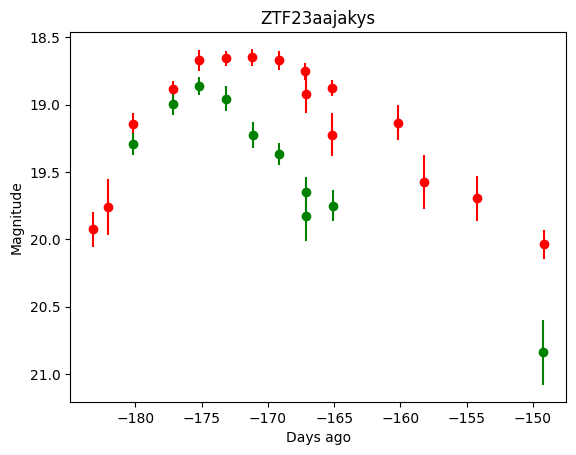

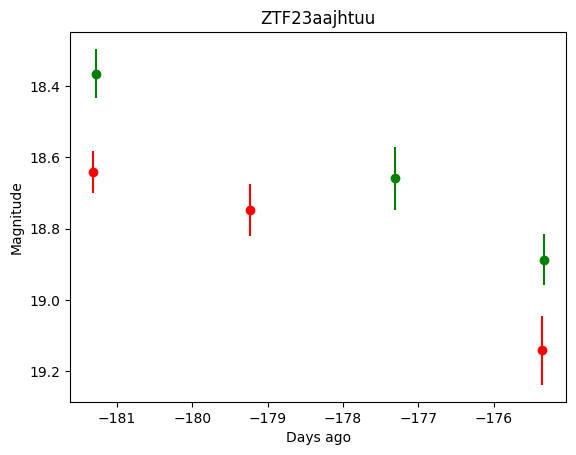

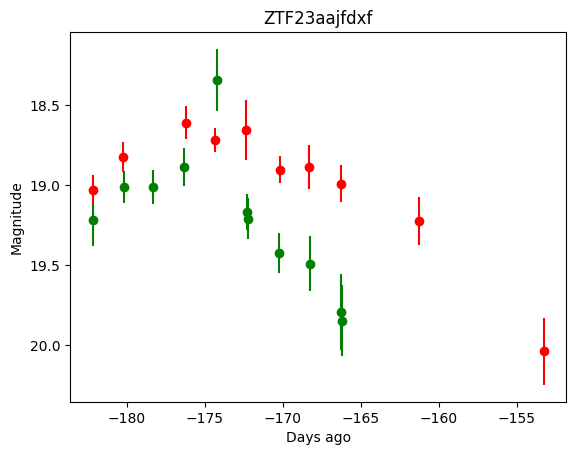

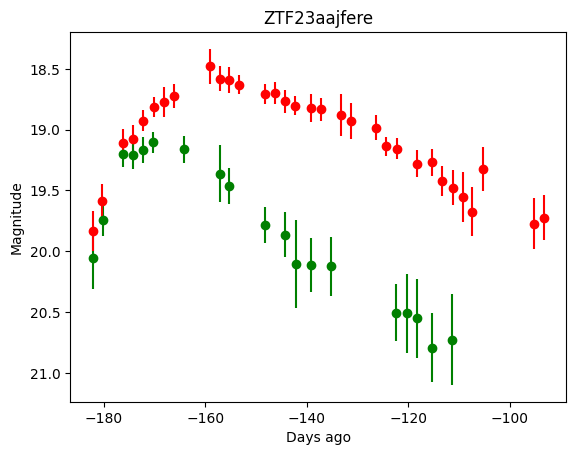

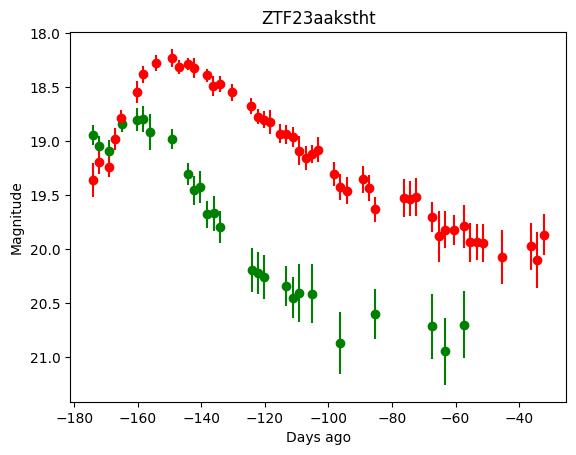

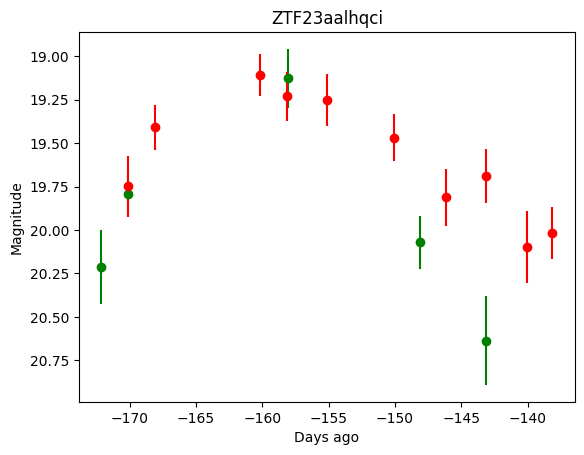

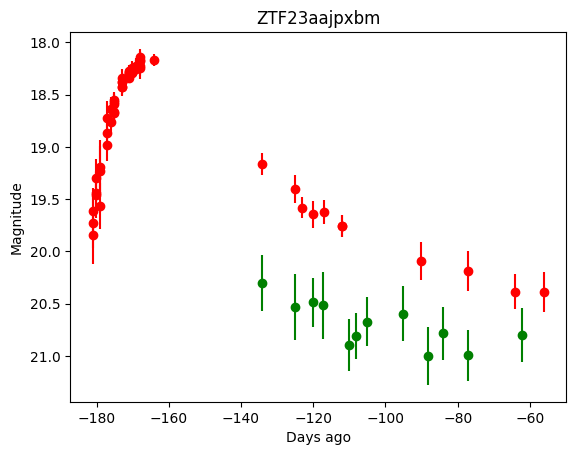

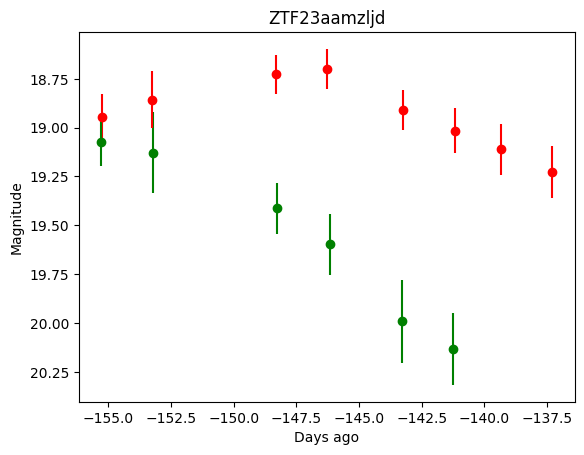

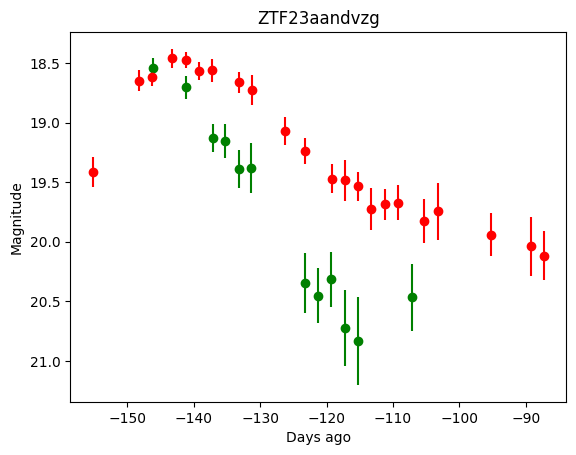

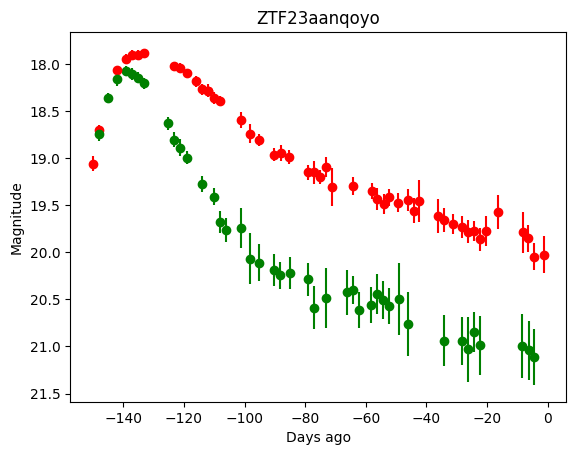

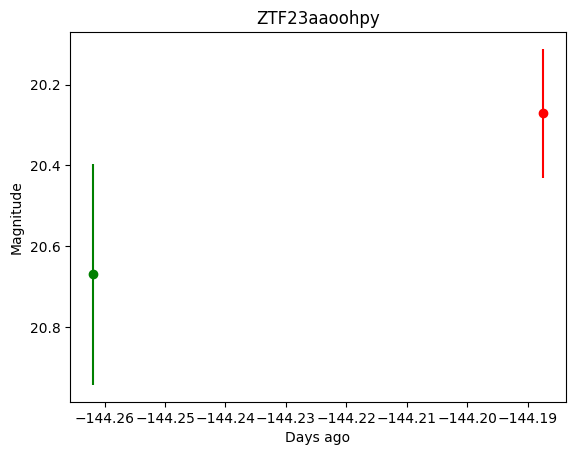

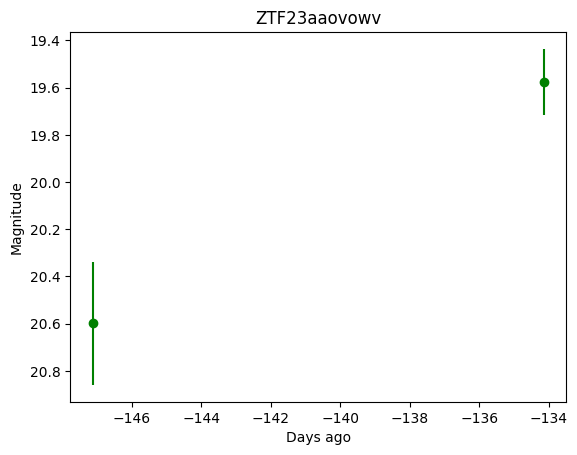

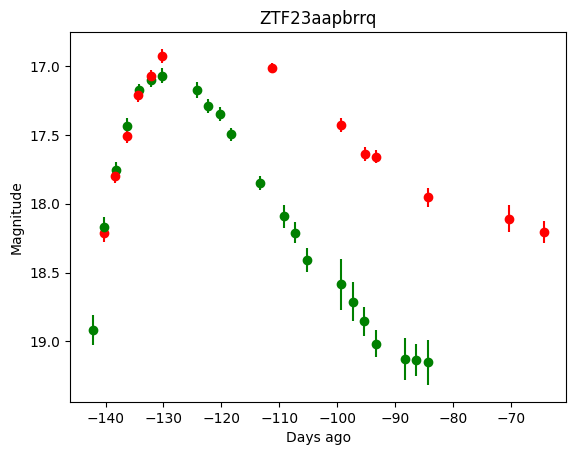

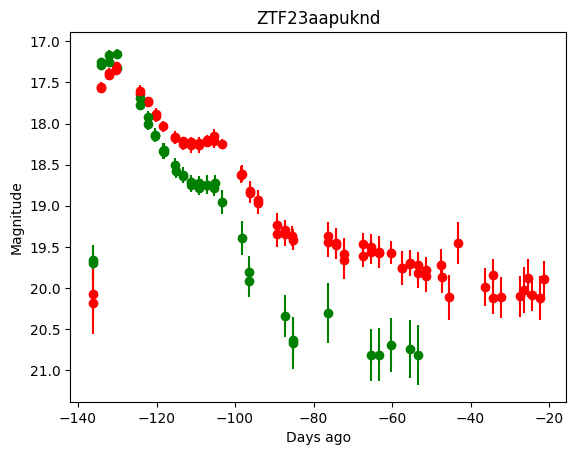

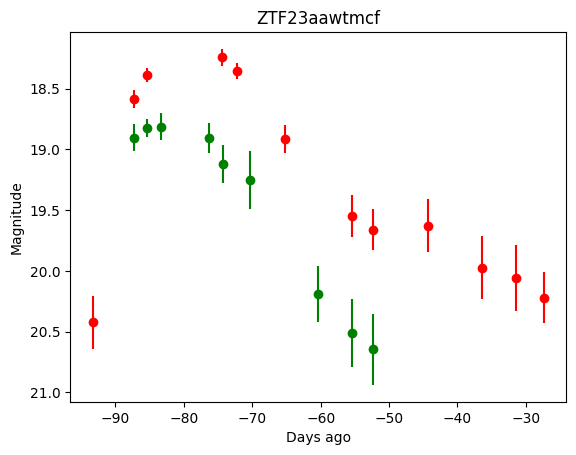

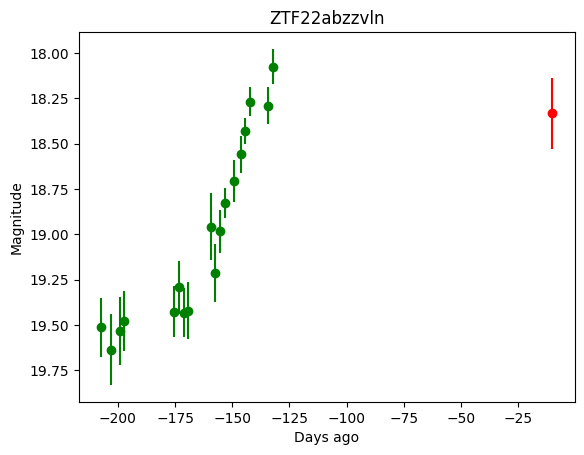

In [7]:
objectList = [row['object'] for row in result]
response = L.objects(objectList)

# create a dictionary of lightcurves

lcsDict = {}
for obj in response:
    lcsDict[obj['objectId']] = {'candidates': obj['candidates']}

cols = {1:'g',2:'r'}

now = Time.now().jd

for obj in response:
    plt.figure()
    plt.subplot(111)
    for i in lcsDict[obj['objectId']]['candidates']:
        if 'isdiffpos' in i:
            if i['isdiffpos']=='t':
                plt.errorbar(i['jd']-now,i['magpsf'],i['sigmapsf'],fmt='o',color=cols[i['fid']])
            else:
                plt.errorbar(i['jd']-now,i['magpsf'],i['sigmapsf'],fmt='+',color=cols[i['fid']])


    plt.gca().invert_yaxis()
    plt.ylabel('Magnitude')
    plt.xlabel('Days ago')
    plt.title(obj['objectId'])
